In [ ]:
## Importing all the necessary libraries
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
import tensorflow as tf
from PIL import Image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
## Mounting drive inorder to read data
from google.colab import drive
drive.mount('/content/gdrive')

train_path = '/content/drive/My Drive/training'
test_path = '/content/drive/My Drive/testing'

Mounted at /content/gdrive


In [ ]:
## Fetching the train images and label information
trainimages = []  
trainlabels =[]     
i = 0
for folder in os.listdir('gdrive/My Drive/training'):
  train_path = 'gdrive/My Drive/training/'+folder
  for filename in os.listdir(train_path):
        
        image_path = train_path+"/"+filename

        img = cv2.imread(image_path)
        
        img = cv2.resize(img,(150,150))

        trainlabels.append(i)
        
        trainimages.append(img)
  i=i+1

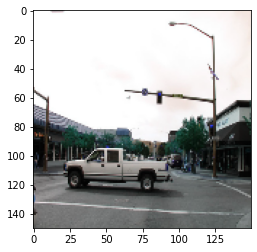

In [ ]:
plt.imshow(trainimages[2122])

In [ ]:
## Fetching the test images and label information
testimages = []  
testlabels =[]     
j = 0
for folder in os.listdir('gdrive/My Drive/testing'):
  test_path = 'gdrive/My Drive/testing/'+folder
  for filename in os.listdir(test_path):
        
        image_path = test_path+"/"+filename

        img = cv2.imread(image_path)
        
        img = cv2.resize(img,(150,150))

        testlabels.append(j)
        
        testimages.append(img)
  j=j+1


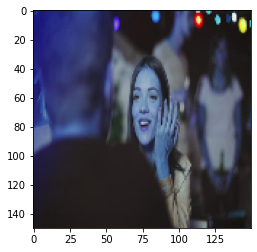

In [ ]:
plt.imshow(testimages[540])
plt.show()

In [ ]:
## Converting into array and normalize
trainimages = np.array(trainimages)
trainimages = trainimages/255.0
trainlabels=np.array(trainlabels)
testimages = np.array(testimages)
testimages = testimages/255.0
testlabels=np.array(testlabels)

In [ ]:
testlabels=[2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,
             3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,
9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,
5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,
16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,
11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,
12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,
15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,
10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,
17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,
13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,
14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,
]

In [ ]:
## Spliting Train and Validation data
trainimages, valimages, trainlabels, vallabels = train_test_split(trainimages, trainlabels, test_size=0.2, shuffle=True)

In [ ]:
## Creating model for our CNN

regularizer = regularizers.l1(l=0.001) 
model = Sequential()
model.add(Conv2D(64, (3, 3), kernel_regularizer=regularizer,input_shape=(150,150,3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))

model.add(Dense(19))
model.add(Activation('softmax'))

## Compiling the model 
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()
## Fitting the model
history=model.fit(trainimages, trainlabels, batch_size=30, epochs=10, validation_data=(valimages, vallabels),shuffle='False')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 activation (Activation)     (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 72, 72, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                    

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


60/60 [==============================] - 15s 81ms/step - loss: 3.7825 - accuracy: 0.1018 - val_loss: 2.8075 - val_accuracy: 0.2090
Epoch 2/10
60/60 [==============================] - 4s 66ms/step - loss: 2.4468 - accuracy: 0.2762 - val_loss: 2.5627 - val_accuracy: 0.2337
Epoch 3/10
60/60 [==============================] - 4s 66ms/step - loss: 1.7843 - accuracy: 0.5028 - val_loss: 2.4688 - val_accuracy: 0.2921
Epoch 4/10
60/60 [==============================] - 4s 71ms/step - loss: 1.0998 - accuracy: 0.7165 - val_loss: 2.6415 - val_accuracy: 0.2854
Epoch 5/10
60/60 [==============================] - 4s 67ms/step - loss: 0.5835 - accuracy: 0.8774 - val_loss: 2.9662 - val_accuracy: 0.3303
Epoch 6/10
60/60 [==============================] - 4s 67ms/step - loss: 0.2585 - accuracy: 0.9584 - val_loss: 3.3374 - val_accuracy: 0.3169
Epoch 7/10
60/60 [==============================] - 4s 67ms/step - loss: 0.1540 - accuracy: 0.9865 - val_loss: 3.7275 - val_accuracy: 0.3236
Epoch 8/10
60/60 [=====

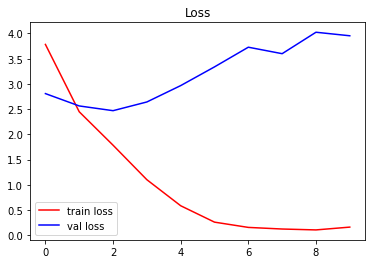

In [ ]:
## Training Loss Vs Validation Loss
plt.plot(history.history['loss'], color='r',label='train loss')
plt.plot(history.history['val_loss'], color='b', label ='val loss')
plt.title("Loss")
plt.legend()
plt.show()


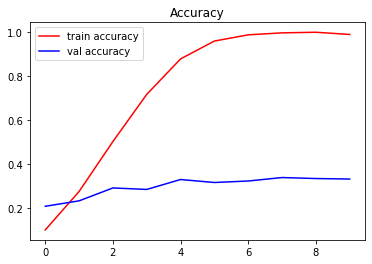

In [ ]:
## Plotting the Train Accuracy Vs Validation Accuracy
plt.plot(history.history['accuracy'], color='r', label="train accuracy")
plt.plot(history.history['val_accuracy'], color='b', label="val accuracy")
plt.title("Accuracy")
plt.legend()
plt.show()

[[12  0  0  0  0  4  0  0  2  1  0  0  3  0  3  0  5  0  0]
 [ 2  6  0  0  1  3  0  0  2  0  0  2  7  1  0  0  4  2  0]
 [ 0  0 22  3  0  0  0  0  0  3  0  0  1  0  0  0  1  0  0]
 [ 4  0  1  9  0  0  0  0  2  4  0  0  3  3  1  1  0  1  1]
 [ 3  0  2  2  9  1  0  1  0  1  0  1  2  0  0  0  7  1  0]
 [ 4  3  0  2  1  5  0  0  0  4  1  0  3  0  0  0  7  0  0]
 [ 0  0  0  0  0  0 11  0  1  0  0  1  0 13  0  3  1  0  0]
 [ 1  0  0  1  2  3  0  8  0  1  0  0  1  1  2  2  5  3  0]
 [ 1  0  3  5  1  2  0  1  4  4  0  2  5  0  0  0  2  0  0]
 [ 0  2  6  1  1  3  0  0  2  7  1  1  3  0  0  0  1  2  0]
 [ 2  2  3  1  1  3  0  2  1  0  2  0  2  7  1  0  2  1  0]
 [ 1  0  0  0  0  1  0  0  0  2  2  4 11  1  0  2  6  0  0]
 [ 2  1  2  1  1  2  0  0  4  1  1  2  4  0  0  1  8  0  0]
 [ 0  1  1  0  0  0  1  0  0  0  0  0  2 22  0  2  1  0  0]
 [ 2  0  1  2  1  2  2  1  1  2  0  2  6  1  1  0  5  1  0]
 [ 1  0  1  4  1  0  3  0  0  1  0  0  1  1  0 14  0  0  3]
 [ 2  0  0  0  2  9  0  0  1  2  0  0  3

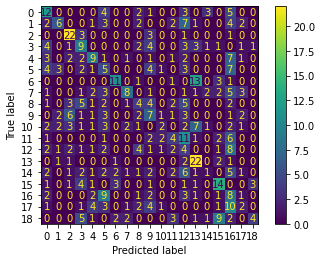

In [ ]:
## Plotting the Confusion matrix and Evaluvating the test accuracy
y_pred1 = model.predict(testimages)
y_pred1 = np.argmax(y_pred1, axis=1)
cm = confusion_matrix(testlabels, y_pred1)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
## Test Accuracy
print(accuracy_score(testlabels, y_pred1))

In [ ]:
## Pulling VGG16 weights
vgg = VGG16(input_shape=(150,150,3), weights='imagenet', include_top=False)
## Making all the above layers intrainable
for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)
pred = Dense(19, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=pred)
model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
# fit the model
history = model.fit(trainimages,trainlabels,validation_data=(valimages, vallabels),epochs=10,batch_size=32)

from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image("model.png")

80150528/80134624 [==============================] - 2s 0us/step
Epoch 1/10
56/56 [==============================] - 21s 318ms/step - loss: 1.7686 - accuracy: 0.4691 - val_loss: 1.1753 - val_accuracy: 0.6292
Epoch 2/10
56/56 [==============================] - 13s 240ms/step - loss: 0.6705 - accuracy: 0.8211 - val_loss: 0.9382 - val_accuracy: 0.7079
Epoch 3/10
56/56 [==============================] - 13s 240ms/step - loss: 0.4129 - accuracy: 0.9162 - val_loss: 0.9361 - val_accuracy: 0.7169
Epoch 4/10
56/56 [==============================] - 13s 240ms/step - loss: 0.2706 - accuracy: 0.9573 - val_loss: 0.8669 - val_accuracy: 0.7258
Epoch 5/10
56/56 [==============================] - 13s 240ms/step - loss: 0.1874 - accuracy: 0.9809 - val_loss: 0.9074 - val_accuracy: 0.7191
Epoch 6/10
56/56 [==============================] - 13s 240ms/step - loss: 0.1350 - accuracy: 0.9916 - val_loss: 0.8373 - val_accuracy: 0.7393
Epoch 7/10
56/56 [==============================] - 13s 240ms/step - loss: 0.

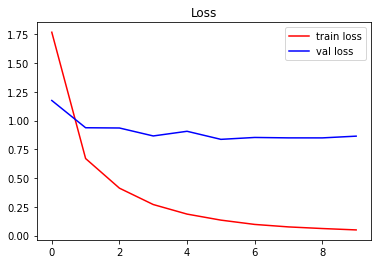

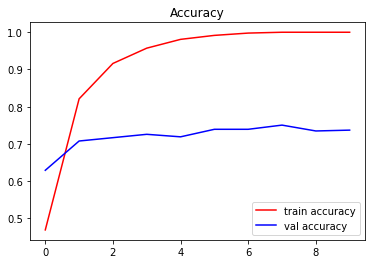

[[20  0  0  0  1  2  0  0  0  0  2  0  0  0  1  1  3  0  0]
 [ 0 24  0  0  0  1  0  0  1  0  0  2  0  0  2  0  0  0  0]
 [ 0  0 24  0  1  1  0  0  0  2  1  0  0  1  0  0  0  0  0]
 [ 0  0  0 19  0  0  1  0  1  2  0  0  0  1  1  1  0  1  3]
 [ 0  0  0  0 24  0  0  0  0  1  1  0  0  0  0  0  4  0  0]
 [ 2  0  0  0  1 17  0  0  2  1  1  0  1  0  1  0  3  1  0]
 [ 0  0  0  0  0  0 27  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 0  0  0  0  4  0  0 19  0  1  0  1  1  0  1  0  3  0  0]
 [ 0  0  0  0  0  2  0  0 23  1  3  0  0  1  0  0  0  0  0]
 [ 1  1  1  0  0  0  0  0  0 24  0  0  0  1  0  0  0  2  0]
 [ 0  0  0  0  0  0  1  0  1  2 22  0  0  1  0  0  1  2  0]
 [ 0  0  0  0  0  0  0  0  0  0  1 19  1  0  8  1  0  0  0]
 [ 0  0  0  0  1  3  0  0  2  0  1  1 17  1  0  0  4  0  0]
 [ 0  0  0  0  0  0  1  0  1  0  0  0  0 28  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  1  6  0  0 20  0  2  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0 26  0  0  3]
 [ 2  1  0  0  1  3  0  0  0  0  1  0  1

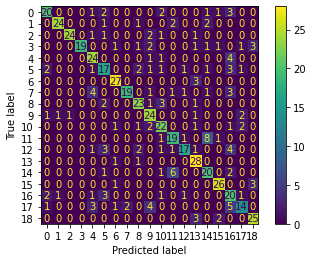

In [ ]:
## Plotting graphs of Training loss Vs Validation loss
plt.plot(history.history['loss'], color='r',label='train loss')
plt.plot(history.history['val_loss'], color='b', label ='val loss')
plt.title("Loss")
plt.legend()
plt.show()
## Plotting graphs of Training Accuracy Vs Validation Accuracy
plt.plot(history.history['accuracy'], color='r', label="train accuracy")
plt.plot(history.history['val_accuracy'], color='b', label="val accuracy")
plt.title("Accuracy")
plt.legend()
plt.show()
y_pred = model.predict(test_images)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(testlabels, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print(accuracy_score(testlabels, y_pred))
